# First computer exercise in Machine Learning: Unsuperised methods

## Part A: Principal Component Analysis

Write a function that performs PCA on a (note necessarily centered) data in a 2D numpy array. The function should return the pca transformed data along with the eigenvalues and eigenvectors of the tranformation. Use the numpy package. 

In [1]:
import numpy as np
# Use the numpy eigenvalue solver for the covariance matrix
E, V = np.linalg.eig(np.array([[0,2], [1, 1]]))
# The solver doesn't return ordered eigenvalues, so we have to fix this
key = np.argsort(E)[::-1]
V = V[:,key]
E = E[key]
print(E)
print(V)

[ 2. -1.]
[[-0.70710678 -0.89442719]
 [-0.70710678  0.4472136 ]]


In [2]:
# delete me: https://stackoverflow.com/questions/13224362/principal-component-analysis-pca-in-python
def PCA2(data, pca_components=2):
    """
    PCA with eigenvalues
    
    :param data: A 2d numpy array where data.shape == (number_of_data_points, dimensionality_of_data_points)
    :returns: tuple (U, E, V) 
        WHERE
        U is a numpy array of the pca transformed data
        E is an ordered numpy array of eigenvalues
        V is an ordered numpy array of eigenvectors
    """
    ### YOUR CODE STARTS HERE ###
    
    m, n = data.shape
    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R = np.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = np.linalg.eig(R)
    # sort eigenvalue in decreasing order
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # sort eigenvectors according to same index
    E = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    V = evecs[:, :pca_components]
    U = np.dot(V.T, data.T).T
    V = np.transpose(V)
    ### YOUR CODE ENDS HERE ###
    return (U, E, V)

We will begin with the MNIST data set https://en.wikipedia.org/wiki/MNIST_database. It is commonly used for "hello world" purposes in machine learning.

In [3]:
import matplotlib.pyplot as plt 
from course_utils import *

#  The images have been scaled down to 8x8 pixels, and will be stored in a flat numpy vector. 
XX, YY = load_mnist_data()
print("The shape of the data vector XX is: {}".format(XX.shape))
print("The shape of the label vector YY is: {}" .format(YY.shape))
# Display a sample
plt.imshow(np.reshape(XX[0,:], (8, 8)), cmap="gray")
plt.show()

The shape of the data vector XX is: (1797, 64)
The shape of the label vector YY is: (1797,)


<Figure size 640x480 with 1 Axes>

Check that your function outputs a solution that agrees with the canonical python implementation of PCA

In [4]:
from sklearn.decomposition import PCA
(U, E, V) = PCA2(XX, 2)
pca = PCA(n_components=2)
pca.fit(XX)
if np.transpose(V).shape == pca.components_.shape:
    print("Try transposing your eigenvector output")
assert(np.allclose([1, 1], np.abs(np.diagonal(np.inner(V, pca.components_)))))
print("Success!")

Success!


In [5]:
X, Y = load_ini_data2()
clusters = len(np.unique(Y))

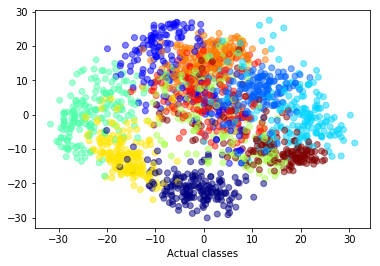

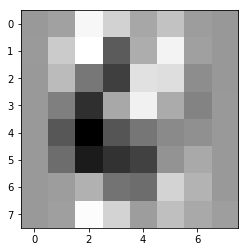

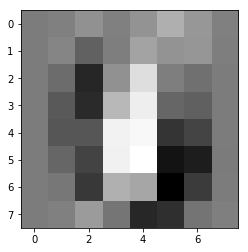

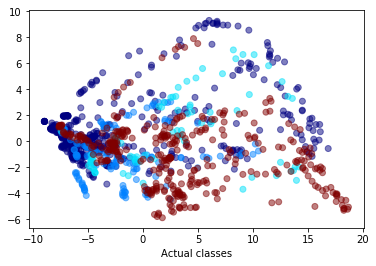

(2, 1024)


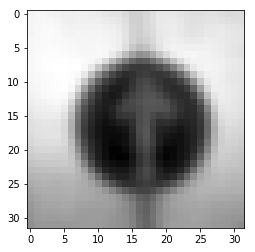

(2, 1024)


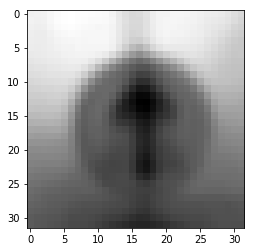

In [18]:
# Viz with 2 pca components
pca_features, _, _ = PCA2(XX, 2)
plt.xlabel('Actual classes')
plt.scatter(pca_features[:,0], pca_features[:,1], c=YY, alpha=0.5, cmap="jet")
plt.show()
for i in range(2):
    comp_image = np.reshape(V[i,:], (8,8))
    plt.imshow(comp_image, cmap="gray")
    plt.show()
pca_features, _, V = PCA2(X, 2)
plt.xlabel('Actual classes')
plt.scatter(pca_features[:,0], pca_features[:,1], c=Y, alpha=0.5, cmap="jet")
plt.show()
for i in range(2):
    comp_image = np.reshape(V[i,:], (32, 32))
    plt.imshow(comp_image, cmap="gray")
    plt.show()


## Part B: K-Means clustering

c:\users\bubu\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\bubu\appdata\local\programs\python\python36\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
c:\users\bubu\appdata\local\programs\python\python36\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all 

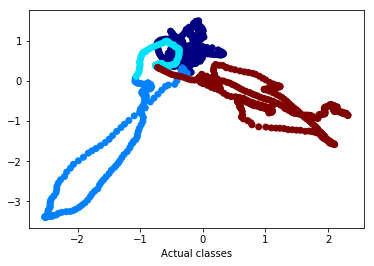

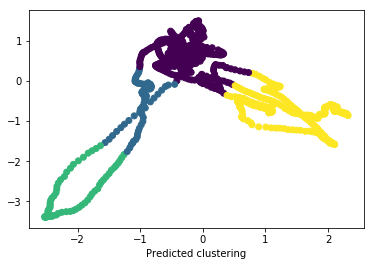

In [7]:
# Viz with 2 sfa features
from sklearn.cluster import KMeans
import mdp

sfa = mdp.nodes.SFANode(output_dim=2)
slow_features = sfa.execute(X)
# slow_features = > function from assignment 5 <  
kmeans = KMeans(init='random', n_clusters=clusters)
kmeans.fit(slow_features)
classes = kmeans.predict(slow_features)
# classes = > function from assignment 3 <  
plt.scatter(slow_features[:,0], slow_features[:,1], c=Y, cmap="jet")
plt.xlabel("Actual classes")
plt.show()

plt.scatter(slow_features[:,0], slow_features[:,1], c=classes)
plt.xlabel("Predicted clustering")
plt.show()

## Part C: Slow Feature Analysis

In [8]:
# Same as above, but now with SFA features. 
# Here they should find that all metrics are significantly better
# with a good number of SFA features: turns out that exploiting
# the knowledge that the data is ordered is pretty useful.
from time import time
from sklearn import metrics

sfa_features = [2, 5, 10, 20, 50, 99]
for features in sfa_features:  
    t0 = time()
    sfa = mdp.nodes.SFANode(output_dim=features)
    slow_features = sfa.execute(X)
    # slow_features = > function from assignment 5 <  
    kmeans = KMeans(init='random', n_clusters=clusters)
    kmeans.fit(slow_features)
    classes = kmeans.predict(slow_features)
    # classes = > function from assignment 3 <  
    print("{} sfa components, Purity: {:.2}, ARI: {:.2}, Seconds: {:.2} ".format(features,
                                             purity_score(Y, classes),
                                             metrics.adjusted_rand_score(Y, classes),
                                                              time() - t0))
    
t0 = time()
kmeans = KMeans(init='random', n_clusters=clusters)
kmeans.fit(X)
classes = kmeans.predict(X)
# classes = > function from assignment 3 <  

print("raw pixels\t , Purity: {:.2}, ARI: {:.2}, Seconds: {:.2}".format(purity_score(Y, classes),
                                    metrics.adjusted_rand_score(Y, classes),
                                    time() - t0))


2 sfa components, Purity: 0.85, ARI: 0.6, Seconds: 0.82 
5 sfa components, Purity: 0.78, ARI: 0.52, Seconds: 0.5 
10 sfa components, Purity: 0.65, ARI: 0.26, Seconds: 0.68 
20 sfa components, Purity: 0.58, ARI: 0.12, Seconds: 0.46 
50 sfa components, Purity: 0.57, ARI: 0.093, Seconds: 0.6 
99 sfa components, Purity: 0.5, ARI: -0.02, Seconds: 0.78 
raw pixels	 , Purity: 0.59, ARI: 0.16, Seconds: 1.1


In [9]:
# Functions that I imagine requiring students to implement: 
# purity_score(y_true, y_predicted), davies_bouldin_score(X, y_predicted)
# DONE: the equivalent of pca.fit_transform(n_components, X)
# and kmeans.predict(n_clusters, X)
# and some sort of "sfa.fit_transform(n_features, X)"